# Using a numerical integration within fsolve
## In this example, we find the chemical potential of a collection of non-interacting identical Bosons.
*May 5, 2021*

- First import some required modules

In [9]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

The left-hand side of the equation that we will solve is:

$2\pi^2 n\left(\dfrac{\hbar^2}{2mk_\mathrm{B}T}\right)^{3/2}$

where
> $n$ is the particle number density<br>
$m$ is the mass of the particles<br>
$T$ is temperature

- We will enter the appropriate values of $^4$He and use a temperature of 4 K.

In [10]:
n = 2.2e28 # 1/m^3
m = 6.68e-27 # kg
hbar = 1.05e-34 # Js
kB = 1.38e-23 # J/K
T = 4 # K
LHS = 2*np.pi**2*n*(hbar**2/(2*m*kB*T))**(3/2)
LHS

0.7937834051194786

On the right-hand side of the equation that we want to solve is the integral:

$\int_0^\infty \dfrac{x^2}{e^{x^2-\eta}-1}\, dx$

where $\eta=\mu/k_\mathrm{B}T$ and $\mu$ is the chemical potential.


- First, define a function that represents the integrand of the integral.

In [11]:
def integrand(x, eta):
    return x**2/(np.exp(x**2 - eta) - 1)

- Next, define a second fucntion that calls the first function, integrates it numerically using *quad()* and then returns LHS - RHS where the RHS is the integral.  Ultimately, we want to find the value of $\eta$ that makes this difference zero.

In [12]:
def func(eta):
    y, err = quad(integrand, 0, np.inf, args=(eta,))
    return LHS - y

- Now, use *fsolve()* to find the solution for $\eta$ when $T=4$~K.  The second option in *fsolve()* is an initial guess for the value of the solution.  We can then use the $\eta$ solution to calculate $\mu/k_\mathrm{B} = \eta T$.

In [13]:
sol = fsolve(func, -0.07)
print('The value of eta is', sol[0], 'when the temperature is', T,'K.')
print('The value of mu/kB is', sol[0]*T, 'K when the temperature is', T,'K.')

The value of eta is -0.06714819569069219 when the temperature is 4 K.
The value of mu/kB is -0.26859278276276877 K when the temperature is 4 K.


<ipython-input-11-abff491f9b2d>:2: RuntimeWarning: overflow encountered in exp
  return x**2/(np.exp(x**2 - eta) - 1)


We can put the *fsolve()* statement inside a for loop so that $\eta$ and $\mu/k_\mathrm{B}$ can be found at many different temperatures.

- First, delete the value assigned to $T$ and define another function for the LHS of the equation that we want to solve.

In [14]:
del T
def LHS(T):
    return 2*np.pi**2*n*(hbar**2/(2*m*kB*T))**(3/2)
LHS(4)

0.7937834051194786

- We also need to update the function "func(eta)" so that "LHS" $\to$ "LHS(T)" is given as a function of T.

In [15]:
def func(eta):
    y, err = quad(integrand, 0, np.inf, args=(eta,))
    return LHS(T) - y

We need to provide *fsolve()* with initial guesses for each iteration of the loop.  The strategy will be to use the $\eta$ solution from the previous iteration as the guess for the current iteration.  We then only need to have a reasonable first guess for the first iteration.

We will start the loop at the highest temperature when the chemical potential should have a value that is close to the classical result for an ideal gas. In this case, $\eta=\mu/k_\mathrm{B}T$ is expected to be close to $\ln\left(n/n_\mathrm{Q}\right)$, where:

$n_\mathrm{Q}=\left(\dfrac{mk_\mathrm{B}T}{2\pi\hbar^2}\right)^{3/2}$

- Create some empty lists and then execute the for loop.

In [16]:
TList = []
etaList = []
muList = []
T0 = 100
nQ = (m*kB*T0/(2*np.pi*hbar**2))**(3/2)
guess = np.log(n/nQ)
for T in np.arange(100, 4, -0.1):
    TList += [T]
    sol = fsolve(func, guess)[0]
    etaList += [sol]
    muList += [sol*T]
    guess = sol # Update the guess value before starting the next iteration

<ipython-input-11-abff491f9b2d>:2: RuntimeWarning: overflow encountered in exp
  return x**2/(np.exp(x**2 - eta) - 1)


- Here's a plot of $\eta$ as a function of temperature with the temperature axis on a log-scale.

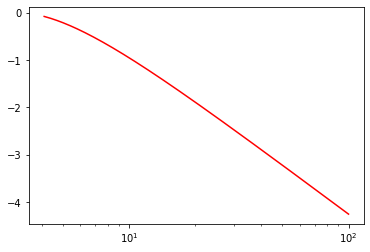

In [17]:
plt.semilogx(TList, etaList, 'r-');

- Here's a plot of our calculated result of $\eta$ compared to the classical result.  As expected, the calculed $\eta$ matches the classical result at the highest temperatures.

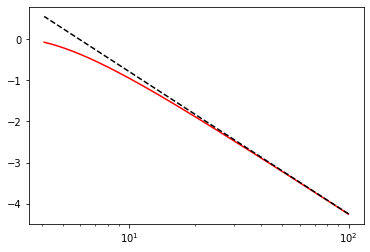

In [18]:
# Repeat the plot from above.
plt.semilogx(TList, etaList, 'r-');

# Add the classical result.
nQ = (m*kB*np.array(TList)/(2*np.pi*hbar**2))**(3/2)
etaClassical = np.log(n/nQ)
plt.semilogx(TList, etaClassical, 'k--');

Finally, we can also plot the temperature dependence of $\mu$ form out calculation.

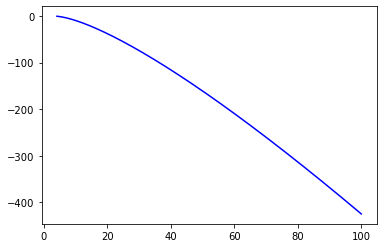

In [19]:
plt.plot(TList, muList, 'b-');